In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from math import sqrt

In [2]:
N = 9 # no. of bodies
t0 = 0.0
tf = 10e03 # days
h = 1 
steps = int((tf-t0)/h)
G = 3.405759081037858e-11

Xs = np.zeros((steps, N,3))
Vs = np.zeros((steps, N, 3))

Ms = [1.989e6,0.330,4.87,5.97,0.642,1898,568,86.8,102]

Xs[0] = [[-9.95114977680456E+05, 8.98124266329700E+05, 1.58229931598423E+04],
              [3.44615441391852E+07,-5.26557638532672E+07,-7.61286267143204E+06],
              [-6.77779938168010E+07,-8.43597394901336E+07,2.69958030976802E+06],
              [-2.77904903569589E+07,1.45531279592339E+08,8.81421672415733E+03],
              [9.18866271313871E+07,2.06696061841096E+08,2.05002398237805E+06],
              [4.54003785963550E+08,-6.10682430690077E+08,-7.62390632497143E+06],
              [8.20351176602562E+08,-1.24706574543561E+09,-1.09761808144217E+07],
              [2.29533745289993E+09,1.86512722528805E+09,-2.28093347838273E+07],
              [4.40623682311692E+09,-7.81771702943420E+08,-8.54471655924357E+07]]

Vs[0] = [[-1.02322911909127E+03, -8.62040073870347E+02, 3.22970824014921E+01],
             [2.66853110932131E+06, 2.52863729277372E+06, -3.81479438257272E+04],
             [2.35980800402788E+06, -1.88090247751281E+06,-1.62002003392357E+05],
             [-2.57276934940778E+06, -4.78827962928565E+05, -7.40263589142244E+00],
             [-1.82981597359163E+06, 1.03827381243802E+06, 6.66708767010003E+04],
             [8.91855173066660E+05, 7.26974788682208E+05, -2.29741878167567E+04],
             [6.50758615732736E+05, 4.56696587751460E+05, -3.39034493618639E+04],
             [-3.75348244065152E+05, 4.29216592436392E+05, 6.45229544743987E+03],
             [7.88686712937182E+04, 4.65184720928017E+05, -1.13436707185877E+04]]

def acceleration(pos, step):
    a = np.zeros((N, 3))
    
    for j in range(N):
        x, y,z = pos[j]
        ax,ay,az = np.zeros(3)
        for i in range(N):
            if j==i:
                continue
            else:
                xi,yi,zi = Xs[step][i]
                r = sqrt((x-xi)**2+(y-yi)**2+(x-xi)**2)
#                 print(r)
                ax += -G*Ms[i]*(x-xi)/r**3
                ay += -G*Ms[i]*(y-yi)/r**3
                az += -G*Ms[i]*(z-xi)/r**3
        a[j] = [ax,ay,az]
    return a

for step in range(1,steps):
    
    Vs[step, :,0] = Vs[step-1, :, 0] + acceleration(Xs[step-1,:,:], step)[:,0]*h/2
    Vs[step, :,1] = Vs[step-1, :, 1] + acceleration(Xs[step-1,:,:], step)[:,1]*h/2
    Vs[step, :,2] = Vs[step-1, :, 2] + acceleration(Xs[step-1,:,:], step)[:,2]*h/2
    
    Xs[step, :, 0] = Xs[step-1, :, 0] + Vs[step, :,0]*h
    Xs[step, :, 1] = Xs[step-1, :, 1] + Vs[step, :,1]*h
    Xs[step, :, 2] = Xs[step-1, :, 2] + Vs[step, :,2]*h
    
    Vs[step, :,0] = Vs[step, :, 0] + acceleration(Xs[step,:,:], step)[:,0]*h/2
    Vs[step, :,1] = Vs[step, :, 1] + acceleration(Xs[step,:,:], step)[:,1]*h/2
    Vs[step, :,2] = Vs[step, :, 2] + acceleration(Xs[step,:,:], step)[:,2]*h/2

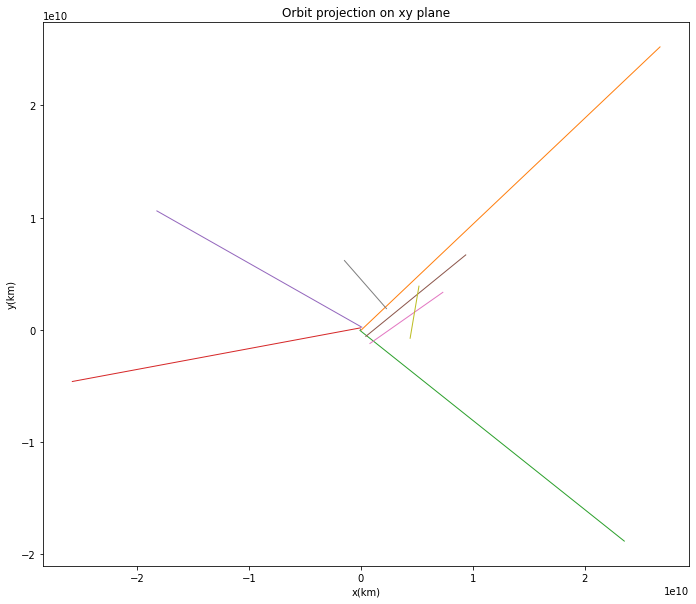

In [3]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot()

for i in range(N):
    ax.plot(Xs[:,i,0],Xs[:,i,1],linewidth = 1)

ax.set(title = 'Orbit projection on xy plane', xlabel = 'x(km)',ylabel = 'y(km)')
ax.set_aspect('equal')